In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import pearsonr
import plotly.express as px

In [85]:

# Load the dataset
movie_df = pd.read_csv('Resources/cleaned_movie_data_fixed.csv')

# Check the first few rows
movie_df.head()


,color,director_name,director_facebook_likes,num_critic_for_reviews,num_user_for_reviews,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,...,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,language,country,gross,budget,content_rating,profit
0,Color,Andrew Stanton,475,462.0,738,Daryl Sabara,640.0,Samantha Morton,632.0,Polly Walker,...,212204,1873,1.0,alien|american civil war|male nipple|mars|prin...,English,USA,73058679,263700000,PG-13,-190641321
1,Color,Robert Zemeckis,0,188.0,444,Tom Hanks,15000.0,Eddie Deezen,726.0,Peter Scolari,...,120798,16264,0.0,boy|christmas|christmas eve|north pole|train,English,USA,665426,165000000,G,-164334574
2,Color,Peter Berg,532,377.0,751,Liam Neeson,14000.0,Alexander Skarsgård,10000.0,Tadanobu Asano,...,202382,26679,0.0,box office flop|hawaii|naval|oahu hawaii|ship,English,USA,65173160,209000000,PG-13,-143826840
3,Color,Carl Rinsch,47,218.0,324,Keanu Reeves,18000.0,Cary-Hiroyuki Tagawa,1000.0,Jin Akanishi,...,116994,20965,2.0,box office flop|ronin|samurai|shogun|tournament,English,USA,38297305,175000000,PG-13,-136702695
4,Color,Bryan Singer,0,338.0,205,Eddie Marsan,979.0,Ewen Bremner,557.0,Ralph Brown,...,106416,1766,1.0,bean|giant|king|no opening credits|princess,English,USA,65171860,195000000,PG-13,-129828140


In [86]:
# Get an overview of the dataset
overview = movie_df.describe()
print(overview)

       director_facebook_likes  num_critic_for_reviews  num_user_for_reviews  \
count              3047.000000             3046.000000           3047.000000   
mean                905.462094              162.864741            333.007220   
std                3327.898887              125.088362            410.460075   
min                   0.000000                1.000000              1.000000   
25%                  11.000000               72.000000            106.000000   
50%                  59.000000              133.000000            207.000000   
75%                 234.000000              220.750000            396.500000   
max               23000.000000              813.000000           4667.000000   

       actor_1_facebook_likes  actor_2_facebook_likes  actor_3_facebook_likes  \
count             3046.000000             3045.000000             3042.000000   
mean              8188.809586             2152.531363              823.548652   
std              16718.404986       

In [87]:
# List of numeric colummns
numeric_columns = [
    'num_critic_for_reviews', 
    'num_user_for_reviews', 
    'actor_1_facebook_likes', 
    'actor_2_facebook_likes', 
    'actor_3_facebook_likes', 
    'imdb_score', 
    'duration', 
    'movie_facebook_likes', 
    'num_voted_users', 
    'cast_total_facebook_likes', 
    'facenumber_in_poster',  
    'budget', 
    'gross',
    'profit'
]

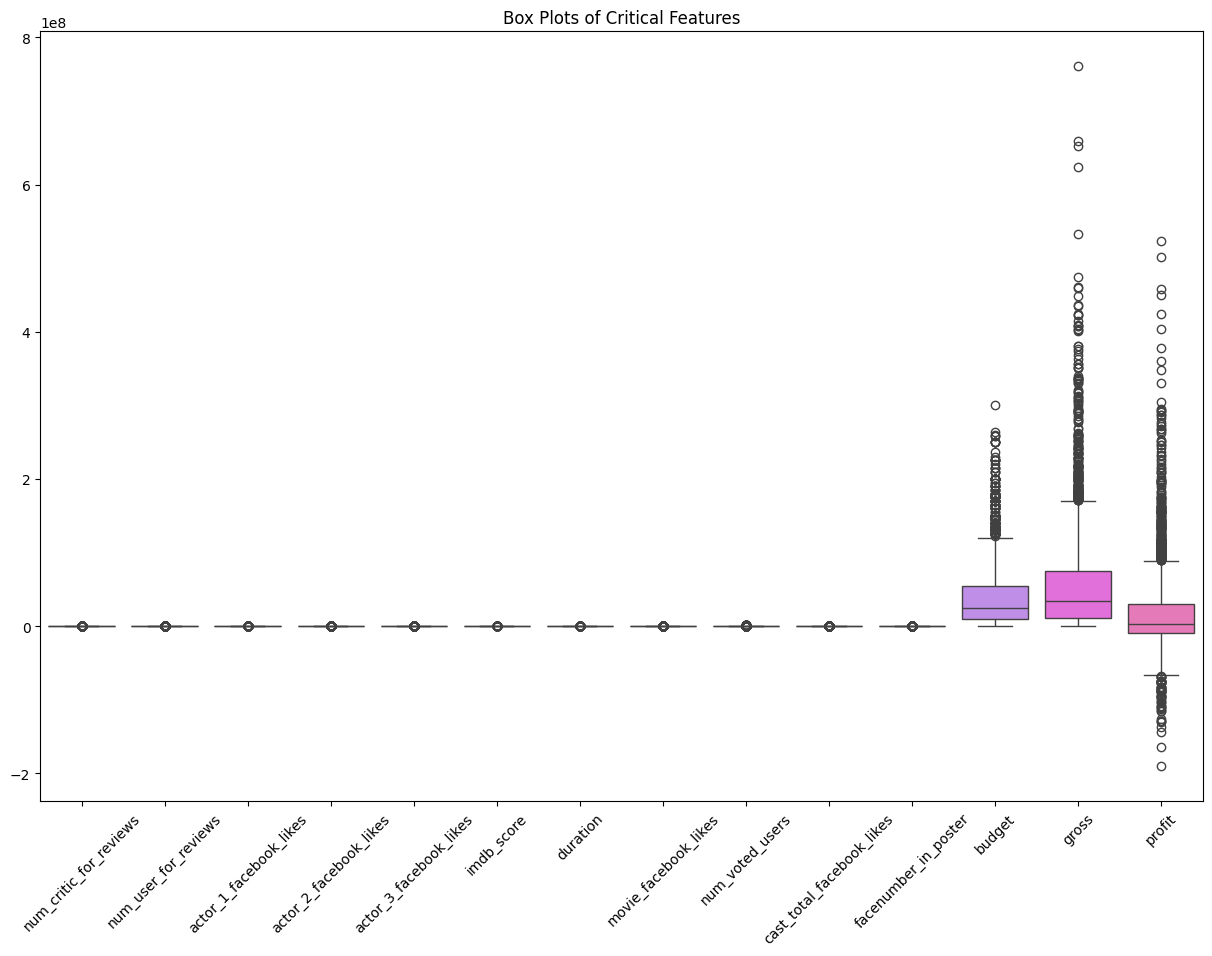

In [88]:
# Create a box plot for each feature
plt.figure(figsize=(15, 10))
sns.boxplot(data=movie_df[numeric_columns])
plt.title('Box Plots of Critical Features')
plt.xticks(rotation=45)
plt.show()

Box plot is used to visualize ths spread of data. It clearly indicate outliers, which can be crucial when analyzing movie data. Box plots are not sensitive to the specific shape of the data distribution and more straightforward especially with side-to-side comparison. Facenumber_in_poster, budget, gross and profit have several outliers so we will use median for them while average for the rest.

In [89]:
# list of normal features
normal_features = [
    'num_critic_for_reviews', 
    'num_user_for_reviews', 
    'actor_1_facebook_likes', 
    'actor_2_facebook_likes', 
    'actor_3_facebook_likes', 
    'imdb_score', 
    'duration', 
    'movie_facebook_likes', 
    'num_voted_users', 
    'cast_total_facebook_likes'
]    
averages = movie_df[normal_features].mean().round(2)
averages

num_critic_for_reviews          162.86
num_user_for_reviews            333.01
actor_1_facebook_likes         8188.81
actor_2_facebook_likes         2152.53
actor_3_facebook_likes          823.55
imdb_score                        6.39
duration                        109.34
movie_facebook_likes           9255.57
num_voted_users              107433.13
cast_total_facebook_likes     12228.00
dtype: float64

In [90]:
# list of skewed features
skewed_features = [
    'facenumber_in_poster',  
    'budget', 
    'gross',
    'profit'
]

# Calculate medians for skewed features
medians = movie_df[skewed_features].median().round(2)
medians


facenumber_in_poster           1.0
budget                  25000000.0
gross                   33682273.0
profit                   3257792.0
dtype: float64

Top Actors by Total Gross:
             actor_name  total_gross  median_gross  total_movies
3436          Tom Hanks   3585548663  1.327981e+08            27
2947  Robert Downey Jr.   3504990276  1.348073e+08            26
1715        Johnny Depp   3495953348  1.028222e+08            34
1286      Harrison Ford   3479593335  1.288738e+08            27
2529     Morgan Freeman   3359050934  9.330697e+07            36


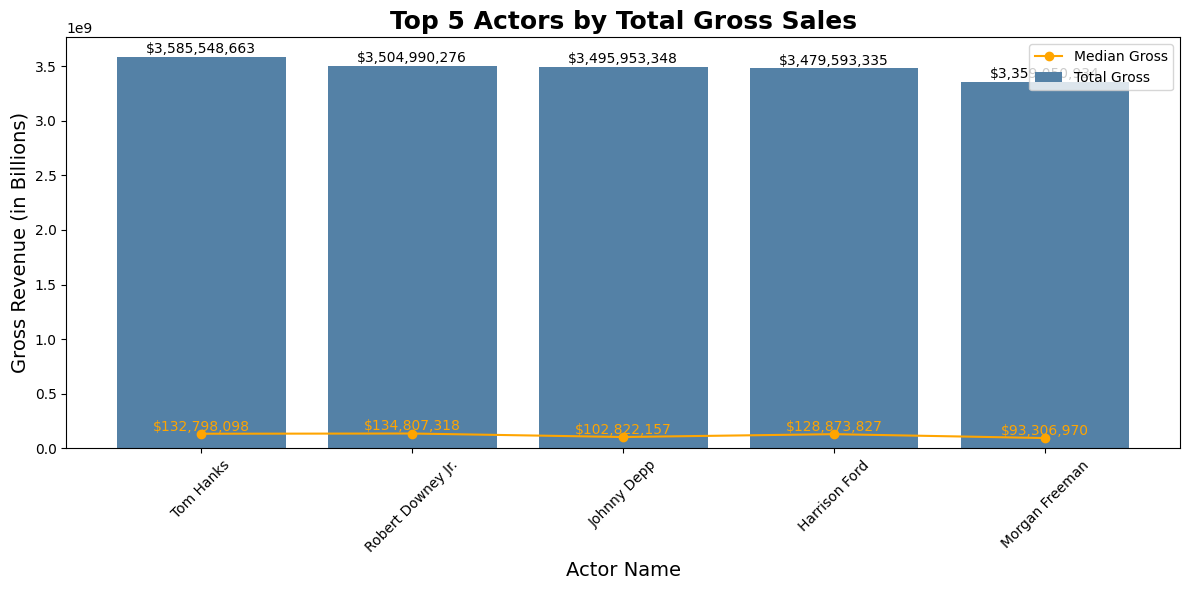

In [91]:
# Melt the DataFrame to get all actors in one column
melted_df = movie_df.melt(id_vars=['gross'], value_vars=['actor_1_name', 'actor_2_name', 'actor_3_name'],
                           var_name='actor_position', value_name='actor_name')

# Drop any rows with NaN actor names (if any)
melted_df = melted_df.dropna(subset=['actor_name'])

# Calculate the overall median gross for the entire population
overall_median_gross = melted_df['gross'].median()

# Group by actor name and calculate total gross and total movie count
actor_stats = melted_df.groupby('actor_name').agg(
    total_gross=('gross', 'sum'),  # Total gross for each actor
    total_movies=('gross', 'count')  # Count of movies for each actor
).reset_index()

# Get the top 5 actors based on total gross
top_actors_by_gross = actor_stats.nlargest(5, 'total_gross')

# Calculate median gross for these top actors
top_actors_by_gross['median_gross'] = top_actors_by_gross['total_gross'] / top_actors_by_gross['total_movies']

# Print the actors with their total number of movies
print("Top Actors by Total Gross:")
print(top_actors_by_gross[['actor_name', 'total_gross', 'median_gross', 'total_movies']])  # Include total_movies in print

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot for total gross
sns.barplot(x='actor_name', y='total_gross', data=top_actors_by_gross, color='steelblue', label='Total Gross')

# Overlay the line graph for median gross
plt.plot(top_actors_by_gross['actor_name'], top_actors_by_gross['median_gross'], color='orange', marker='o', label='Median Gross')

# Add annotations for the bars
for i, gross in enumerate(top_actors_by_gross['total_gross']):
    plt.text(i, gross + 5000000, f'${int(gross):,}', ha='center', va='bottom', fontsize=10, color='black')

# Add annotations for the median gross line
for i, median in enumerate(top_actors_by_gross['median_gross']):
    plt.text(i, median + 500000, f'${int(median):,}', ha='center', va='bottom', fontsize=10, color='orange')

# Title and labels
plt.title('Top 5 Actors by Total Gross Sales', fontsize=18, fontweight='bold')
plt.xlabel('Actor Name', fontsize=14)
plt.ylabel('Gross Revenue (in Billions)', fontsize=14)

# Customize ticks
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()



Tom Hanks consistently performing well across both total gross and median gross. Robert Downey Jr.'s high median gross suggests he has consistently been part of blockbuster films. Morgan Freeman's extensive career is notable, even if his individual movie performance (median gross) is lower than his peers.

Top Actors by Median Gross:
            actor_name  median_gross  total_movies
1240     Gloria Stuart   658672302.0             1
2745     Peter Cushing   460935665.0             1
687      Conrad Vernon   436471036.0             1
2605     Niketa Calame   422783777.0             1
223   Anthony Reynolds   407999255.0             1


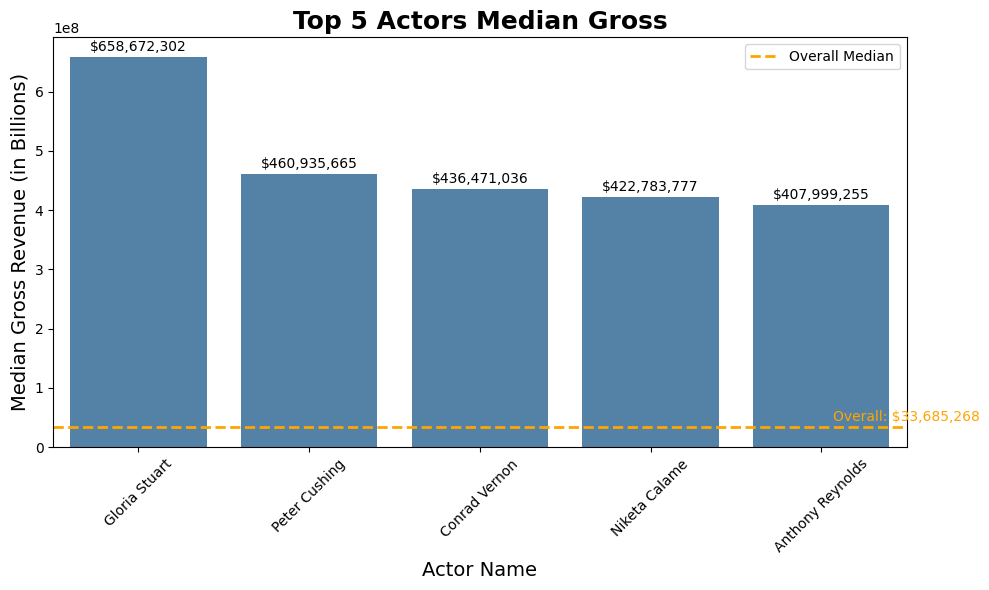

In [92]:
# Melt the DataFrame to get all actors in one column
melted_df = movie_df.melt(id_vars=['gross'], value_vars=['actor_1_name', 'actor_2_name', 'actor_3_name'],
                           var_name='actor_position', value_name='actor_name')

# Drop any rows with NaN actor names (if any)
melted_df = melted_df.dropna(subset=['actor_name'])

# Calculate the median gross for the entire population
overall_median_gross = melted_df['gross'].median()

# Group by actor name and calculate median gross and total movie count
actor_stats = melted_df.groupby('actor_name').agg(
    median_gross=('gross', 'median'),
    total_movies=('gross', 'count')  # Count of movies for each actor
).reset_index()

# Get the top 5 actors based on median gross
top_actors_by_median = actor_stats.nlargest(5, 'median_gross')

# Print the actors with their total number of movies
print("Top Actors by Median Gross:")
print(top_actors_by_median[['actor_name', 'median_gross', 'total_movies']])  # Include total_movies in print

# Add a row for overall median gross
overall_median_df = pd.DataFrame({
    'actor_name': ['Overall Median'],
    'median_gross': [overall_median_gross],
    'total_movies': [None]  # No count for overall median
})

# Combine both DataFrames
combined_df = pd.concat([top_actors_by_median, overall_median_df], ignore_index=True)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for median gross
sns.barplot(x='actor_name', y='median_gross', data=combined_df[:-1], color='steelblue')

# Calculate the x position for the overall median line
overall_median_x = len(top_actors_by_median) - 0.5

# Overlay the line graph for overall median
plt.axhline(overall_median_gross, color='orange', linestyle='--', label='Overall Median', linewidth=2)

# Add annotations for the bars
for i, median in enumerate(combined_df['median_gross'][:-1]):
    plt.text(i, median + 5000000, f'${int(median):,}', ha='center', va='bottom', fontsize=10, color='black')

# Add annotation for overall median
plt.text(overall_median_x, overall_median_gross + 5000000, f'Overall: ${int(overall_median_gross):,}', 
         ha='center', va='bottom', fontsize=10, color='orange')

# Title and labels
plt.title('Top 5 Actors Median Gross', fontsize=18, fontweight='bold')
plt.xlabel('Actor Name', fontsize=14)
plt.ylabel('Median Gross Revenue (in Billions)', fontsize=14)

# Customize ticks
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


Top Directors by Total Gross:
         director_name  total_gross  median_gross  total_movies
1282  Steven Spielberg   4014061704   164435221.0            23
895        Michael Bay   2231242537   138396624.0            13
1316        Tim Burton   2071275480    76519172.0            16
1203         Sam Raimi   2014600898   234903076.0            10
533      James Cameron   1909725910   175562880.5             6


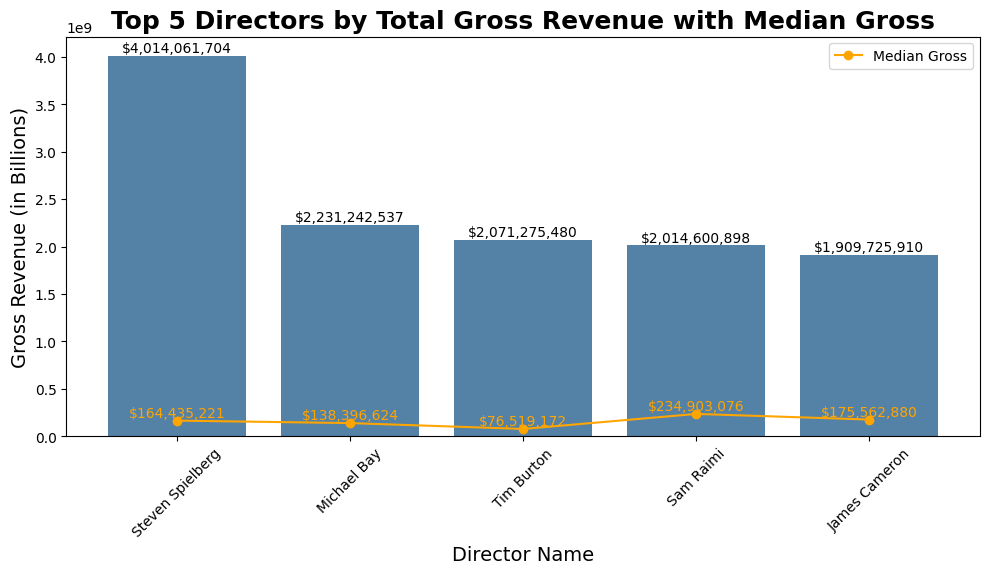

In [93]:
# Group by director and calculate total gross, median gross, and total movie count
director_stats = movie_df.groupby('director_name').agg(
    total_gross=('gross', 'sum'),  # Total gross for each director
    median_gross=('gross', 'median'),  # Median gross for each director
    total_movies=('movie_title', 'count')  # Count of movies directed
).reset_index()

# Get the top 5 directors based on total gross
top_directors_by_total_gross = director_stats.nlargest(5, 'total_gross')

# Print the directors with their total gross, median gross, and total number of movies
print("Top Directors by Total Gross:")
print(top_directors_by_total_gross[['director_name', 'total_gross', 'median_gross', 'total_movies']])  # Include total_gross and total_movies in print

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for top directors' total gross
sns.barplot(x='director_name', y='total_gross', data=top_directors_by_total_gross, color='steelblue')

# Overlay the line graph for median gross
plt.plot(top_directors_by_total_gross['director_name'], top_directors_by_total_gross['median_gross'], 
         color='orange', marker='o', label='Median Gross')

# Add annotations for the bars (total gross)
for i, gross in enumerate(top_directors_by_total_gross['total_gross']):
    plt.text(i, gross + 5000000, f'${int(gross):,}', ha='center', va='bottom', fontsize=10, color='black')

# Annotate the median gross for each director on the line
for i, median in enumerate(top_directors_by_total_gross['median_gross']):
    plt.text(i, median + 5000000, f'${int(median):,}', ha='center', va='bottom', fontsize=10, color='orange')

# Title and labels
plt.title('Top 5 Directors by Total Gross Revenue with Median Gross', fontsize=18, fontweight='bold')
plt.xlabel('Director Name', fontsize=14)
plt.ylabel('Gross Revenue (in Billions)', fontsize=14)

# Customize ticks
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()



Spielberg has the most films, showcasing a long and prolific career. This extensive filmography contributes to his high total gross.

Michael Bay and Tim Burton also have a considerable number of films, with Bay known for his blockbuster hits.

James Cameron, with only 6 films, demonstrates the impact of creating fewer, but exceptionally high-grossing films (e.g., "Avatar" and "Titanic"), leading to a high average gross.

Top Directors by Median Gross:
     director_name  median_gross  total_movies
726    Joss Whedon   458991599.0             3
798    Lee Unkrich   414984497.0             1
188     Chris Buck   400736600.0             1
447   George Lucas   380262555.0             5
1323    Tim Miller   363024263.0             1


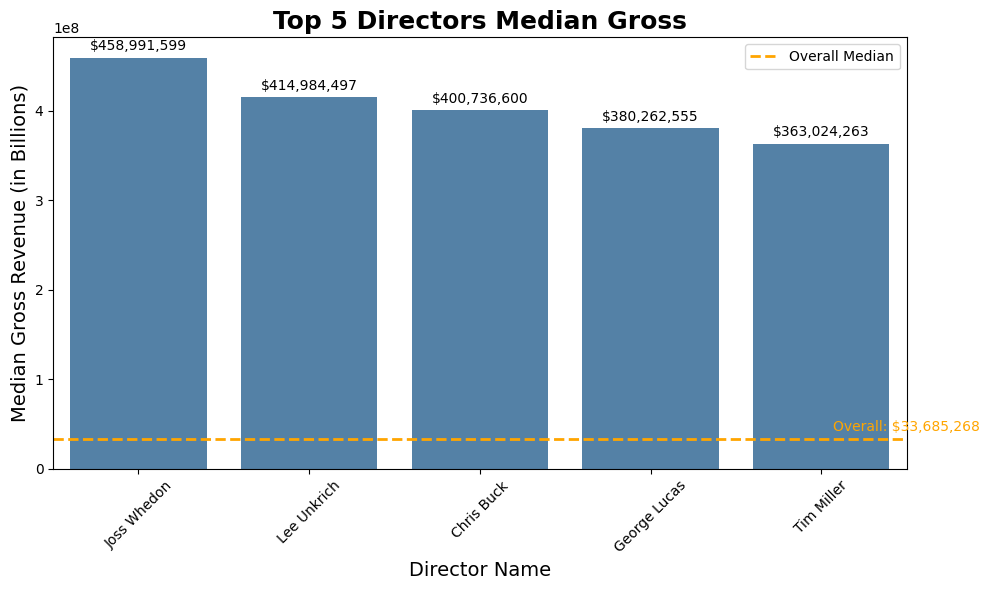

In [94]:
# Group by director and calculate median gross and total movie count
director_stats = movie_df.groupby('director_name').agg(
    median_gross=('gross', 'median'),
    total_movies=('movie_title', 'count')  # Count of movies directed
).reset_index()

# Get the top 5 directors based on median gross
top_directors_by_median = director_stats.nlargest(5, 'median_gross')

# Print the directors with their total number of movies
print("Top Directors by Median Gross:")
print(top_directors_by_median[['director_name', 'median_gross', 'total_movies']])  # Include total_movies in print


# Add a row for overall median gross
overall_median_df = pd.DataFrame({
    'director_name': ['Overall Median'],
    'median_gross': [overall_median_gross]
})

# Combine both DataFrames
combined_df = pd.concat([top_directors_by_median, overall_median_df], ignore_index=True)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for median gross
sns.barplot(x='director_name', y='median_gross', data=combined_df[:-1], color='steelblue')

# Calculate the x position for the overall median line
overall_median_x = len(top_directors_by_median) - 0.5

# Overlay the line graph for overall median
plt.axhline(overall_median_gross, color='orange', linestyle='--', label='Overall Median', linewidth=2)

# Add annotations for the bars
for i, median in enumerate(combined_df['median_gross'][:-1]):
    plt.text(i, median + 5000000, f'${int(median):,}', ha='center', va='bottom', fontsize=10, color='black')

# Add annotation for overall median
plt.text(overall_median_x, overall_median_gross + 5000000, f'Overall: ${int(overall_median_gross):,}', 
         ha='center', va='bottom', fontsize=10, color='orange')

# Title and labels
plt.title('Top 5 Directors Median Gross', fontsize=18, fontweight='bold')
plt.xlabel('Director Name', fontsize=14)
plt.ylabel('Median Gross Revenue (in Billions)', fontsize=14)

# Customize ticks
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()



Top 5 Movies by Total Facebook Likes:
                                 movie_title  total_facebook_likes      gross  \
2644  Anchorman: The Legend of Ron Burgundy              1311730.0   84136909   
2211                  The Final Destination               605465.0   66466372   
1189                               Hardflip               526165.0      96734   
2145                           Interstellar               408488.0  187991439   
3001                  The Dark Knight Rises               343759.0  448130642   

      title_year  
2644        2004  
2211        2009  
1189        2012  
2145        2014  
3001        2012  


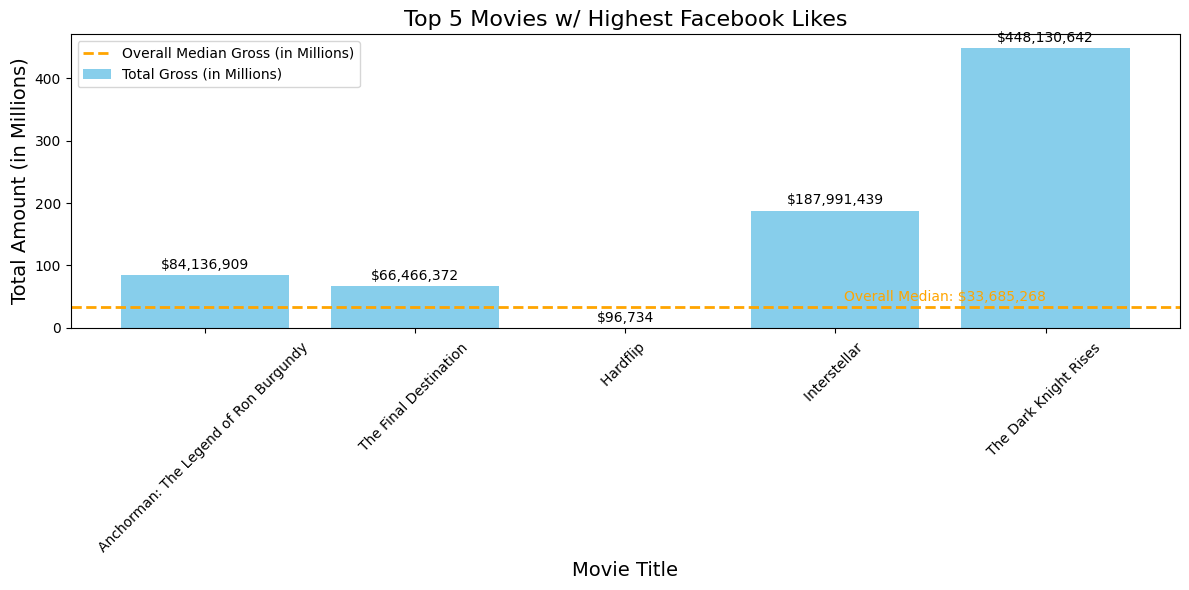

In [95]:
# Create a new column for total Facebook likes
movie_df['total_facebook_likes'] = (
    movie_df['actor_1_facebook_likes'] +
    movie_df['actor_2_facebook_likes'] +
    movie_df['actor_3_facebook_likes'] +  
    movie_df['movie_facebook_likes'] +
    movie_df['cast_total_facebook_likes']
)

# Get the top 5 movies based on total Facebook likes
top_facebook_likes = movie_df.nlargest(5, 'total_facebook_likes')[['movie_title', 'total_facebook_likes', 'gross', 'title_year']]
print("Top 5 Movies by Total Facebook Likes:")
print(top_facebook_likes)

# Set up the figure
plt.figure(figsize=(12, 6))

# Create a vertical bar plot for Total Gross
plt.bar(top_facebook_likes['movie_title'], top_facebook_likes['gross'] / 1_000_000, label='Total Gross (in Millions)', color='skyblue')

# Overlay the line graph for overall median gross
plt.axhline(overall_median_gross / 1_000_000, color='orange', linestyle='--', label='Overall Median Gross (in Millions)', linewidth=2)

# Adding titles and labels
plt.title('Top 5 Movies w/ Highest Facebook Likes', fontsize=16)
plt.ylabel('Total Amount (in Millions)', fontsize=14)
plt.xlabel('Movie Title', fontsize=14)
plt.xticks(rotation=45)
plt.legend()

# Annotate the bars with gross values
for i, gross in enumerate(top_facebook_likes['gross']):
    plt.text(i, gross / 1_000_000 + 5, f'${int(gross):,}', ha='center', va='bottom', fontsize=10, color='black')

# Add annotation for the overall median
plt.text(len(top_facebook_likes) - 1, overall_median_gross / 1_000_000 + 5, 
         f'Overall Median: ${int(overall_median_gross):,}', 
         ha='right', va='bottom', fontsize=10, color='orange')

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()





Top Genres by Total Gross:
                                        genres  total_gross  median_gross  \
95                     Action|Adventure|Sci-Fi   8547475403   157299717.0   
414                                     Comedy   5981909287    23436666.5   
506                             Comedy|Romance   5908240903    33773820.0   
463                       Comedy|Drama|Romance   4371088810    20991497.0   
226  Adventure|Animation|Comedy|Family|Fantasy   3772279478   142614158.0   

     total_movies  
95             45  
414           136  
506           120  
463           125  
226            25  


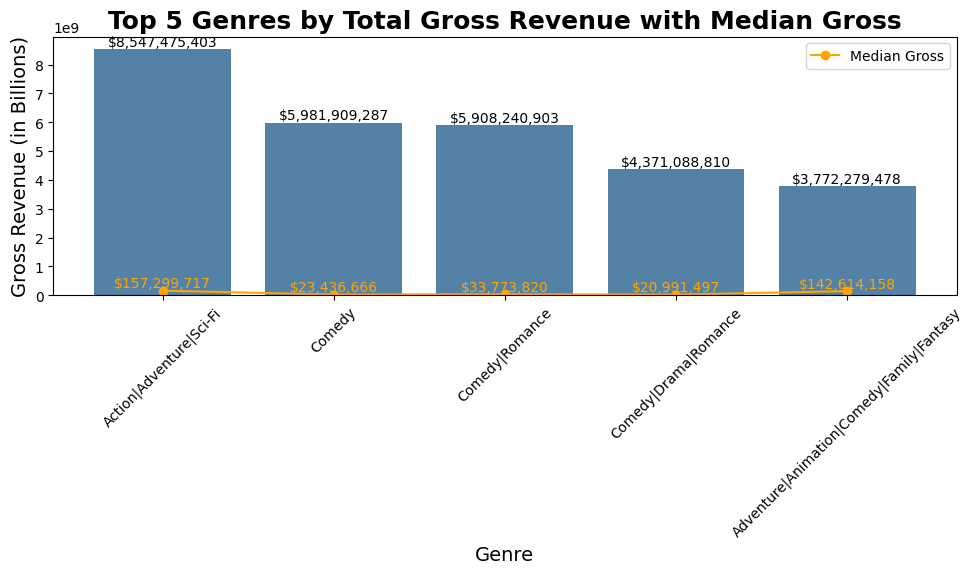

In [96]:
# Group by genre and calculate total gross, median gross, and total movie count
genre_stats = movie_df.groupby('genres').agg(
    total_gross=('gross', 'sum'),  # Total gross for each genre
    median_gross=('gross', 'median'),  # Median gross for each genre
    total_movies=('movie_title', 'count')  # Count of movies in each genre
).reset_index()

# Get the top genres based on total gross
top_genres_by_total_gross = genre_stats.nlargest(5, 'total_gross')

# Print the genres with their total gross, median gross, and total number of movies
print("Top Genres by Total Gross:")
print(top_genres_by_total_gross[['genres', 'total_gross', 'median_gross', 'total_movies']])  # Include total_gross and total_movies in print

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for top genres' total gross
sns.barplot(x='genres', y='total_gross', data=top_genres_by_total_gross, color='steelblue')

# Overlay the line graph for median gross
plt.plot(top_genres_by_total_gross['genres'], top_genres_by_total_gross['median_gross'], 
         color='orange', marker='o', label='Median Gross')

# Add annotations for the bars (total gross)
for i, gross in enumerate(top_genres_by_total_gross['total_gross']):
    plt.text(i, gross + 5000000, f'${int(gross):,}', ha='center', va='bottom', fontsize=10, color='black')

# Annotate the median gross for each genre on the line
for i, median in enumerate(top_genres_by_total_gross['median_gross']):
    plt.text(i, median + 5000000, f'${int(median):,}', ha='center', va='bottom', fontsize=10, color='orange')

# Title and labels
plt.title('Top 5 Genres by Total Gross Revenue with Median Gross', fontsize=18, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Gross Revenue (in Billions)', fontsize=14)

# Customize ticks
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


Popularity vs. Quality: Genres with high total gross, like "Action|Adventure|Sci-Fi," suggest both popularity and strong box office performance. In contrast, genres with many films (like "Comedy") may have a mix of successes and failures, leading to a lower median gross.
Potential for Success: Genres that effectively blend elements (like "Comedy|Romance" or "Adventure|Animation") can attract diverse audiences, suggesting that filmmakers may benefit from exploring these combinations.

Total and Median Gross by Genre:
                                        genres  total_gross  median_gross
95                     Action|Adventure|Sci-Fi   8547475403   157299717.0
414                                     Comedy   5981909287    23436666.5
506                             Comedy|Romance   5908240903    33773820.0
463                       Comedy|Drama|Romance   4371088810    20991497.0
226  Adventure|Animation|Comedy|Family|Fantasy   3772279478   142614158.0


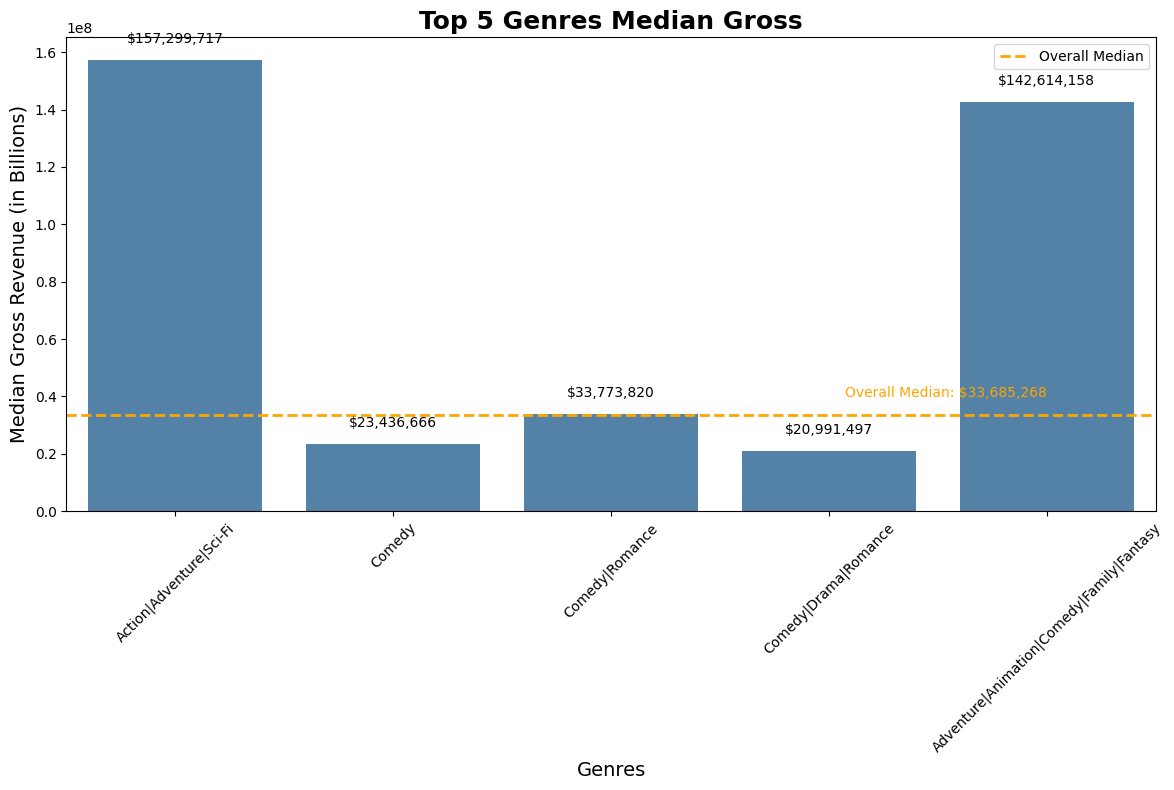

In [97]:
# Group by genre and calculate total gross and median gross
genre_stats = movie_df.groupby('genres').agg(
    total_gross=('gross', 'sum'),
    median_gross=('gross', 'median')
).reset_index()

# Sort the results by total gross to find the top genres
genre_stats = genre_stats.nlargest(5, 'total_gross') 

print("Total and Median Gross by Genre:")
print(genre_stats)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot for the median gross of top genres
sns.barplot(x='genres', y='median_gross', data=genre_stats, color='steelblue')

# Overlay the line graph for overall median
plt.axhline(overall_median_gross, color='orange', linestyle='--', label='Overall Median', linewidth=2)

# Add annotations for the bars
for i, median in enumerate(genre_stats['median_gross']):
    plt.text(i, median + 5000000, f'${int(median):,}', ha='center', va='bottom', fontsize=10, color='black')

# Add annotation for the overall median line
plt.text(len(genre_stats) - 1, overall_median_gross + 5000000, 
         f'Overall Median: ${int(overall_median_gross):,}', 
         ha='right', va='bottom', fontsize=10, color='orange')

# Title and labels
plt.title('Top 5 Genres Median Gross', fontsize=18, fontweight='bold')
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Median Gross Revenue (in Billions)', fontsize=14)

# Customize ticks
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()



Action|Adventure|Sci-Fi leads in both total gross and median gross, highlighting its popularity and financial success.

Comedy, while generating nearly $5.98 billion, has a much lower median gross of $23.4 million. This suggests that while there are many successful comedies, they may also include a higher number of low-grossing films compared to more lucrative genres.

Adventure|Animation|Comedy|Family|Fantasy genre has a total gross of $3.77 billion and a median gross of $142.6 million, indicating a solid revenue generation, likely due to popular family-oriented films.

Top 5 Highest Review Movies
                                        movie_title  num_user_for_reviews  \
3038                               The Dark Knight                   4667   
1529                      The Shawshank Redemption                   4144   
2872                                    The Matrix                   3646   
3039     Star Wars: Episode I - The Phantom Menace                   3597   
2998  Star Wars: Episode II - Attack of the Clones                   3516   

      num_critic_for_reviews  total_reviews      gross  title_year  
3038                   645.0         5312.0  533316061        2008  
1529                   199.0         4343.0   28341469        1994  
2872                   313.0         3959.0  171383253        1999  
3039                   320.0         3917.0  474544677        1999  
2998                   284.0         3800.0  310675583        2002  


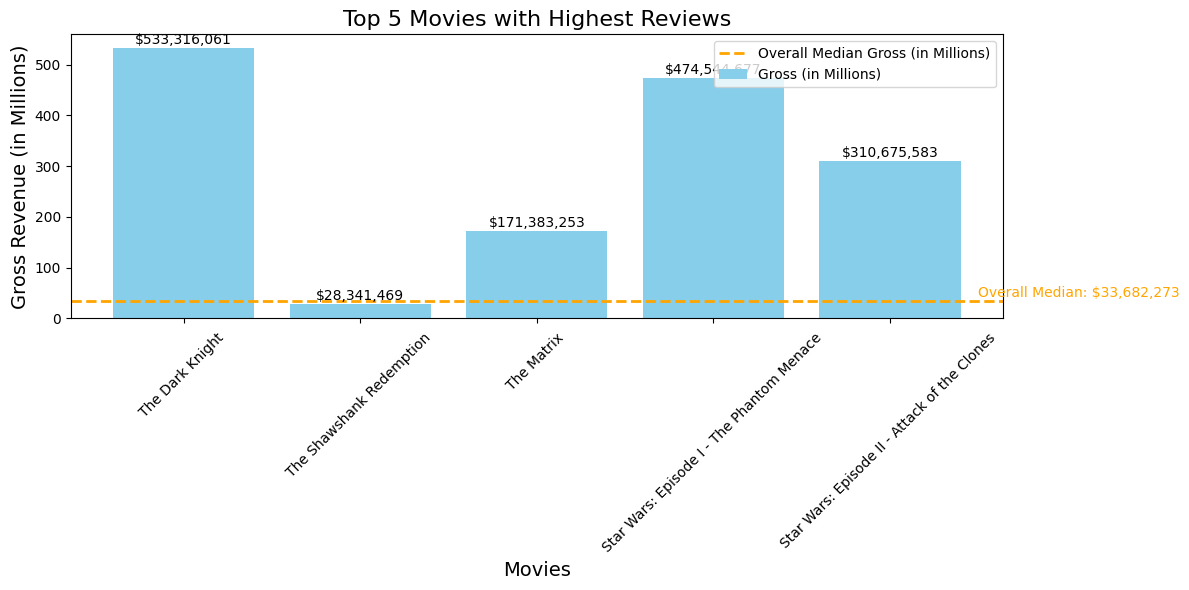

In [98]:
# Create a new column for total reviews
movie_df['total_reviews'] = movie_df['num_user_for_reviews'] + movie_df['num_critic_for_reviews']

# Calculate the overall median gross for the entire population
overall_median_gross = movie_df['gross'].median()

# Get the top 5 movies based on total reviews
top_reviews = movie_df.nlargest(5, 'total_reviews')[['movie_title', 'num_user_for_reviews', 'num_critic_for_reviews', 'total_reviews', 'gross', 'title_year']]

print("Top 5 Highest Review Movies")
print(top_reviews)

# Set up the figure
plt.figure(figsize=(12, 6))

# Create a vertical bar plot for total gross
plt.bar(top_reviews['movie_title'], top_reviews['gross'] / 1_000_000, color='skyblue', label='Gross (in Millions)')

# Overlay the line graph for overall median gross
plt.axhline(overall_median_gross / 1_000_000, color='orange', linestyle='--', label='Overall Median Gross (in Millions)', linewidth=2)

# Add annotations for the bars
for i, gross in enumerate(top_reviews['gross']):
    plt.text(i, gross / 1_000_000 + 2, f'${int(gross):,}', ha='center', va='bottom', fontsize=10, color='black')

# Add annotation for overall median gross line, move to the right
plt.text(4.5, overall_median_gross / 1_000_000 + 2, f'Overall Median: ${int(overall_median_gross):,}', 
         ha='left', va='bottom', fontsize=10, color='orange')

# Adding titles and labels
plt.title('Top 5 Movies with Highest Reviews', fontsize=16)
plt.xlabel('Movies', fontsize=14)
plt.ylabel('Gross Revenue (in Millions)', fontsize=14)

# Customize ticks
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



The Dark Knight leads with 4667 user reviews and a gross of $533 million. Its critical acclaim likely contributed to its commercial success.
The Shawshank Redemption has fewer reviews (4144) but still maintains a solid gross, suggesting a lasting impact and reputation over time despite lower initial box office performance.

# Correlation Analysis
This examines the correlation coefficients among numeric features in a dataset. It helps quantify the strength and direction of relationships between pairs of variables.

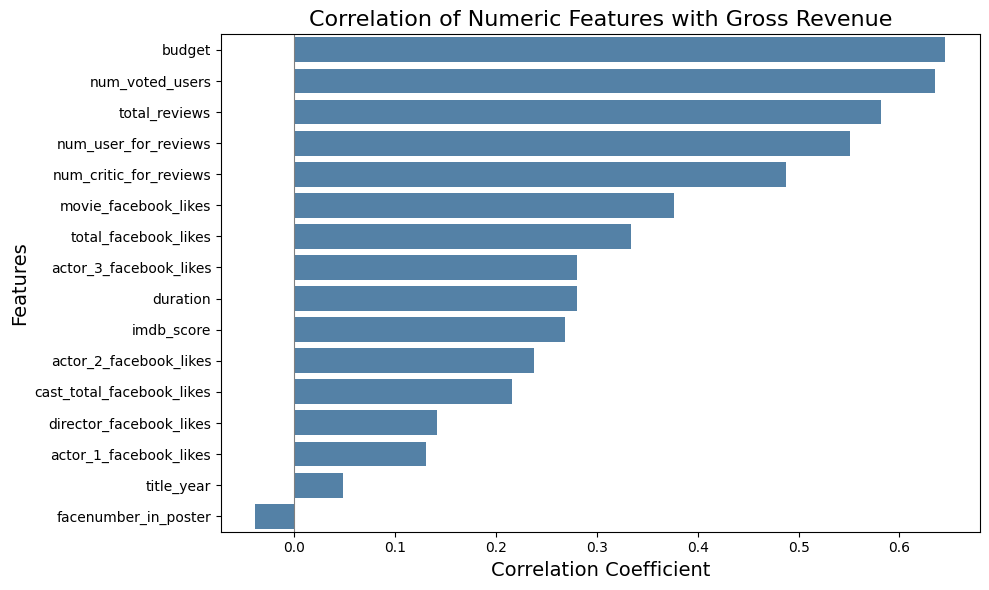

In [99]:
# Define the list of numeric columns, excluding 'color' and 'profit'
numeric_columns = movie_df.select_dtypes(include=['number']).columns.tolist()
numeric_columns.remove('profit')  # Drop the 'profit' column

# Select numeric columns only, excluding 'color' and 'profit'
numeric_df = movie_df[numeric_columns]

# Now you can proceed with the correlation calculation
correlation_matrix = numeric_df.corr()

# Extract correlations with gross
gross_correlation = correlation_matrix['gross'].drop('gross')

# Convert to DataFrame for better visualization
correlation_df = gross_correlation.reset_index()
correlation_df.columns = ['Feature', 'Correlation with Gross']

# Sort the correlation DataFrame by 'Correlation with Gross'
correlation_df = correlation_df.sort_values(by='Correlation with Gross', ascending=False)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot for the sorted correlation values
sns.barplot(x='Correlation with Gross', y='Feature', data=correlation_df, color='steelblue')

# Add titles and labels
plt.title('Correlation of Numeric Features with Gross Revenue', fontsize=16)
plt.axvline(0, color='grey', linewidth=0.8)  # Add a vertical line at zero for reference
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Show the plot
plt.tight_layout()  
plt.show()



All have positive correlation except facenumber_in_poster. 
Budget has a very strong positive correlation, num_voted_usres

In [103]:
# Drop rows with NaNs in numeric_df
numeric_df_clean = numeric_df.dropna()

correlation_results = []

for column in numeric_df_clean.columns:
    if column != 'gross':
        corr, p_value = stats.pearsonr(numeric_df_clean['gross'], numeric_df_clean[column])
        correlation_results.append((column, corr, p_value))

# Create a DataFrame from the results
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Correlation', 'P-Value'])

# Filter for significant correlations
significant_correlations = correlation_df[correlation_df['P-Value'] < 0.05]

# Display significant correlations
print(significant_correlations)


                      Feature  Correlation        P-Value
0     director_facebook_likes     0.141425   4.981137e-15
1      num_critic_for_reviews     0.486058  9.275308e-180
2        num_user_for_reviews     0.550175  9.391387e-240
3      actor_1_facebook_likes     0.131198   3.981226e-13
4      actor_2_facebook_likes     0.237976   2.430036e-40
5      actor_3_facebook_likes     0.281270   2.685807e-56
6                  imdb_score     0.267367   7.652223e-51
7                    duration     0.277194   1.152469e-54
8        movie_facebook_likes     0.372198  2.397677e-100
9                  title_year     0.047728   8.543417e-03
10            num_voted_users     0.634338   0.000000e+00
11  cast_total_facebook_likes     0.216033   2.217290e-33
12       facenumber_in_poster    -0.038960   3.185301e-02
13                     budget     0.644720   0.000000e+00
14       total_facebook_likes     0.331075   1.505922e-78
15              total_reviews     0.580792  2.539696e-273


Budget, and the number of voted users have strong positive correlations with gross revenue, suggesting these are crucial indicators of a film's financial performance. Other factors, like social media engagement (director and actor likes), also show varying degrees of influence but tend to be less impactful than audience reviews and budgets.

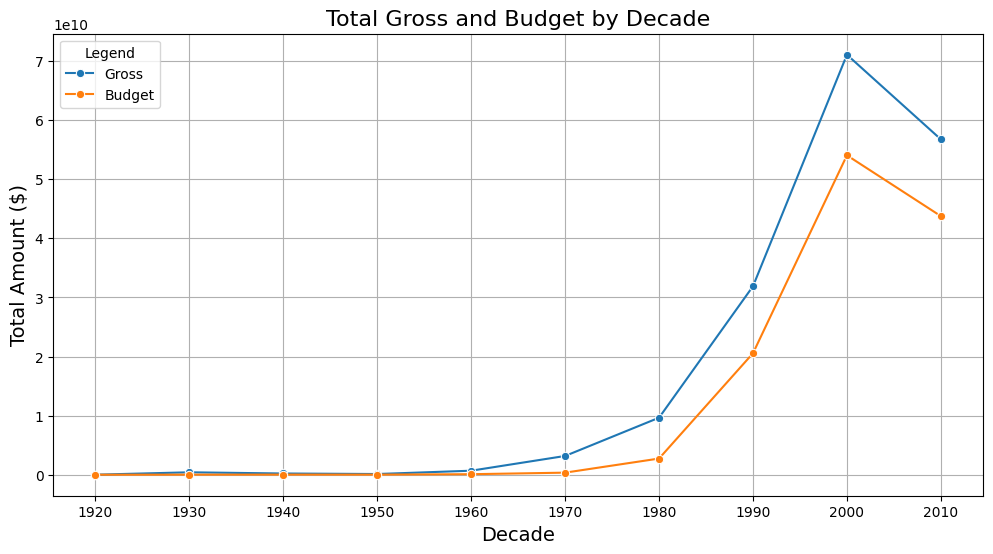

In [104]:
# Create a new column for the decade
movie_df['decade'] = (movie_df['title_year'] // 10) * 10

# Group by decade and sum gross, budget, and duration
decade_stats = movie_df.groupby('decade')[['gross', 'budget']].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Plot gross, budget, and duration
sns.lineplot(data=decade_stats, x='decade', y='gross', label='Gross', marker='o')
sns.lineplot(data=decade_stats, x='decade', y='budget', label='Budget', marker='o')

# Adding titles and labels
plt.title('Total Gross and Budget by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Total Amount ($)', fontsize=14)
plt.legend(title='Legend')
plt.xticks(decade_stats['decade'])
plt.grid()

# Show the plot
plt.show()